![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Running MARRMoT M01 model using eWaterCycle package

This notebooks shows how to run [MARRMoT](https://github.com/wknoben/MARRMoT) M01 model using an example use-case. More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [1]:
import pandas as pd

import ewatercycle.forcing
import ewatercycle.models

## Load forcing data

To download the example forcing file `BMI_testcase_m01_BuffaloRiver_TN_USA.mat`, see this [instruction](https://ewatercycle.readthedocs.io/en/latest/system_setup.html#download-example-forcing).

In [2]:
forcing = ewatercycle.forcing.load_foreign(
    "marrmot",
    directory=".",
    start_time="1989-01-01T00:00:00Z",
    end_time="1992-12-31T00:00:00Z",
    forcing_info={"forcing_file": "BMI_testcase_m01_BuffaloRiver_TN_USA.mat"},
)
print(forcing)

eWaterCycle forcing
-------------------
start_time=1989-01-01T00:00:00Z
end_time=1992-12-31T00:00:00Z
directory=/home/sarah/GitHub/ewatercycle/docs/examples
shape=None
forcing_file=BMI_testcase_m01_BuffaloRiver_TN_USA.mat


## Set up the model

To create the model object, we need to select a version.

In [3]:
ewatercycle.models.MarrmotM01.available_versions

('2020.11',)

In [4]:
model = ewatercycle.models.MarrmotM01(version="2020.11", forcing=forcing)
print(model)

eWaterCycle MarrmotM01
-------------------
Version = 2020.11
Parameter set = 
  None
Forcing = 
  eWaterCycle forcing
  -------------------
  start_time=1989-01-01T00:00:00Z
  end_time=1992-12-31T00:00:00Z
  directory=/home/sarah/GitHub/ewatercycle/docs/examples
  shape=None
  forcing_file=BMI_testcase_m01_BuffaloRiver_TN_USA.mat


In [5]:
model.parameters

[('maximum_soil_moisture_storage', 10.0),
 ('initial_soil_moisture_storage', 5.0),
 ('solver',
  Solver(name='createOdeApprox_IE', resnorm_tolerance=array([0.1]), resnorm_maxiter=array([6.]))),
 ('start time', '1989-01-01T00:00:00Z'),
 ('end time', '1992-12-31T00:00:00Z')]

Setup model with maximum soil moisture storage of 12.0 instead of 10.0 and an earlier end time, making total model time just 1 month.

In [6]:
cfg_file, cfg_dir = model.setup(
    maximum_soil_moisture_storage=12.0,
    end_time="1989-02-01T00:00:00Z",
)
print(cfg_file)
print(cfg_dir)

/home/sarah/GitHub/ewatercycle/docs/examples/marrmot_20210712_135130/marrmot-m01_config.mat
/home/sarah/GitHub/ewatercycle/docs/examples/marrmot_20210712_135130


In [7]:
model.parameters

[('maximum_soil_moisture_storage', 12.0),
 ('initial_soil_moisture_storage', 5.0),
 ('solver',
  Solver(name='createOdeApprox_IE', resnorm_tolerance=array([0.1]), resnorm_maxiter=array([6.]))),
 ('start time', '1989-01-01T00:00:00Z'),
 ('end time', '1989-02-01T00:00:00Z')]

Initialize the model with the config file:

In [8]:
model.initialize(cfg_file)

Get model variable names, only `flux_out_Q` is supported for now.

In [9]:
model.output_var_names

('P',
 'T',
 'Ep',
 'S(t)',
 'par',
 'sol_resnorm_tolerance',
 'sol_resnorm_maxiter',
 'flux_out_Q',
 'flux_out_Ea',
 'wb')

## Run the model

In [10]:
discharge = []
time_range = []
end_time = model.end_time

while model.time < end_time:
    model.update()
    discharge.append(model.get_value("flux_out_Q")[0])
    time_range.append(model.time_as_datetime.date())
    print(model.time_as_isostr)

1989-01-02T00:00:00Z
1989-01-03T00:00:00Z
1989-01-04T00:00:00Z
1989-01-05T00:00:00Z
1989-01-06T00:00:00Z
1989-01-07T00:00:00Z
1989-01-08T00:00:00Z
1989-01-09T00:00:00Z
1989-01-10T00:00:00Z
1989-01-11T00:00:00Z
1989-01-12T00:00:00Z
1989-01-13T00:00:00Z
1989-01-14T00:00:00Z
1989-01-15T00:00:00Z
1989-01-16T00:00:00Z
1989-01-17T00:00:00Z
1989-01-18T00:00:00Z
1989-01-19T00:00:00Z
1989-01-20T00:00:00Z
1989-01-21T00:00:00Z
1989-01-22T00:00:00Z
1989-01-23T00:00:00Z
1989-01-24T00:00:00Z
1989-01-25T00:00:00Z
1989-01-26T00:00:00Z
1989-01-27T00:00:00Z
1989-01-28T00:00:00Z
1989-01-29T00:00:00Z
1989-01-30T00:00:00Z
1989-01-31T00:00:00Z
1989-02-01T00:00:00Z


In [11]:
model.finalize()

## Inspect the results

In [12]:
simulated_discharge = pd.DataFrame(
    {"simulation": discharge}, index=pd.to_datetime(time_range)
)

<AxesSubplot:>

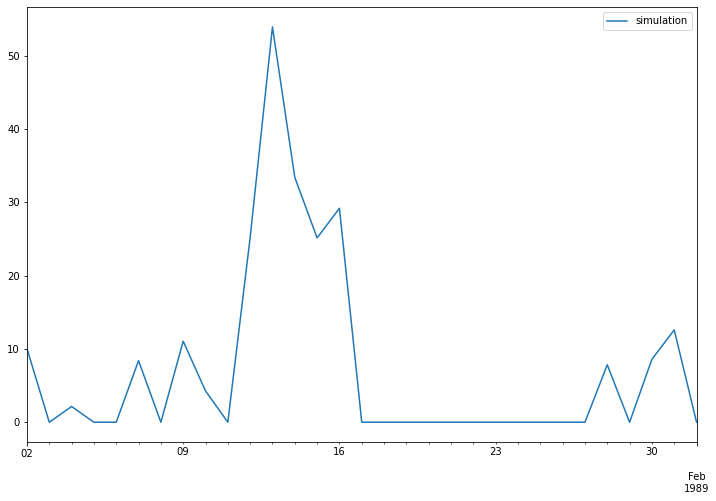

In [13]:
simulated_discharge.plot(figsize=(12, 8))